In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle
import utilities

# Setting parameters
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (16, 8)

# Question to answer: 

### What topics are grads continuing to reference after graduation and into their jobs (for each program)?

Pulling in data and cleaning/preparing it slightly 

In [2]:
df = pd.read_csv('logs_data.csv', index_col=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 48.1+ MB


In [4]:
cohorts = pd.read_csv('cohorts_data.csv')
cohorts = cohorts.drop(columns = ['Unnamed: 0', 'slack', 'created_at', 'updated_at', 'deleted_at'])
combined_df = pd.merge(df, cohorts, how = 'outer', left_on = 'cohort_id', right_on= 'id')

In [5]:
combined_df

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id
0,0.0,2018-01-26,09:55:03,/,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
1,1.0,2018-01-26,09:56:02,java-ii,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2,2.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
3,3.0,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
4,58.0,2018-01-26,10:40:15,javascript-i/functions,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
900224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Balboa,2015-11-03,2016-03-11,4.0
900225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,Redwood,2017-07-31,2017-12-06,2.0
900226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,Ada,2019-02-04,2019-06-16,3.0
900227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Io,2020-07-20,2021-01-21,2.0


In [6]:
# Getting ride of the rows with no date

combined_df = combined_df[combined_df.date.notna()]

In [7]:
def make_datetime_index(df):
    df['datetime'] = pd.to_datetime(df.date + ' ' + df.time)
    df = df.set_index('datetime').sort_index()
    df = df.drop(columns= ['Unnamed: 0', 'date', 'time', 'id'])
    return df

In [8]:
df = make_datetime_index(combined_df)

In [9]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:55:03,/,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:02,java-ii,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2.0,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   path        900222 non-null  object 
 1   user_id     900223 non-null  float64
 2   cohort_id   847330 non-null  float64
 3   ip          900223 non-null  object 
 4   name        847330 non-null  object 
 5   start_date  847330 non-null  object 
 6   end_date    847330 non-null  object 
 7   program_id  847330 non-null  float64
dtypes: float64(3), object(5)
memory usage: 61.8+ MB


In [11]:
# Converting the other two date columns to datetime columns
df['start_date'] = pd.to_datetime(df.start_date)
df['end_date'] = pd.to_datetime(df.end_date)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  float64       
 2   cohort_id   847330 non-null  float64       
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   program_id  847330 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 61.8+ MB


#### Investigating the nulls in cohort_id to see if there is a noticable pattern.

In [107]:
no_cohort = df[df.cohort_id.isna()]
no_cohort = no_cohort.dropna(axis=0, subset=['ip'])

In [108]:
no_cohort.index.min(), no_cohort.index.max()

(Timestamp('2018-01-26 16:46:16'), Timestamp('2021-04-21 12:56:26'))

Comparing to the df datetime min and max

In [109]:
df.index.min(), df.index.max()

(Timestamp('2018-01-26 09:55:03'), Timestamp('2021-04-21 16:44:39'))

No difference, looking at the distribution of times for no_cohort access

<AxesSubplot:xlabel='datetime', ylabel='Count'>

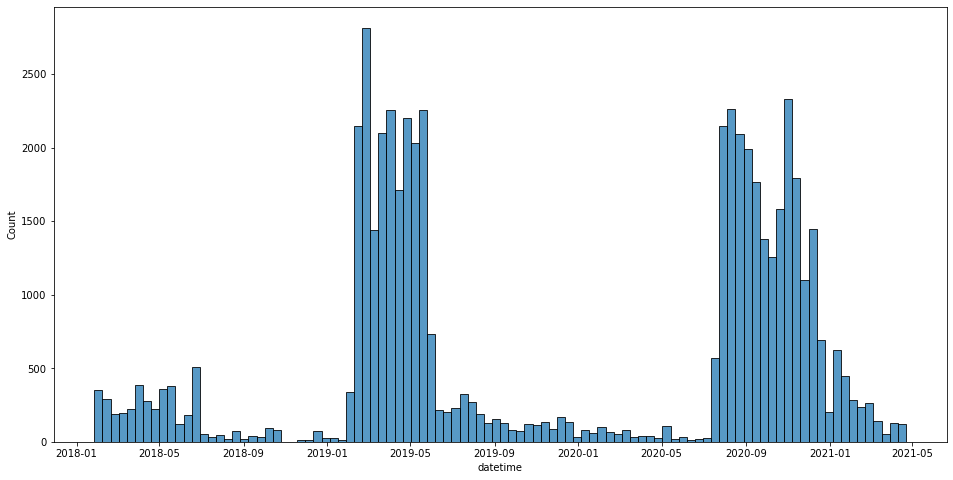

In [110]:
sns.histplot(data=no_cohort.index, bins = 100)

comparing to overall dataframe histplot

Looks like this is a couple of unencoded cohorts?

<AxesSubplot:xlabel='datetime', ylabel='Count'>

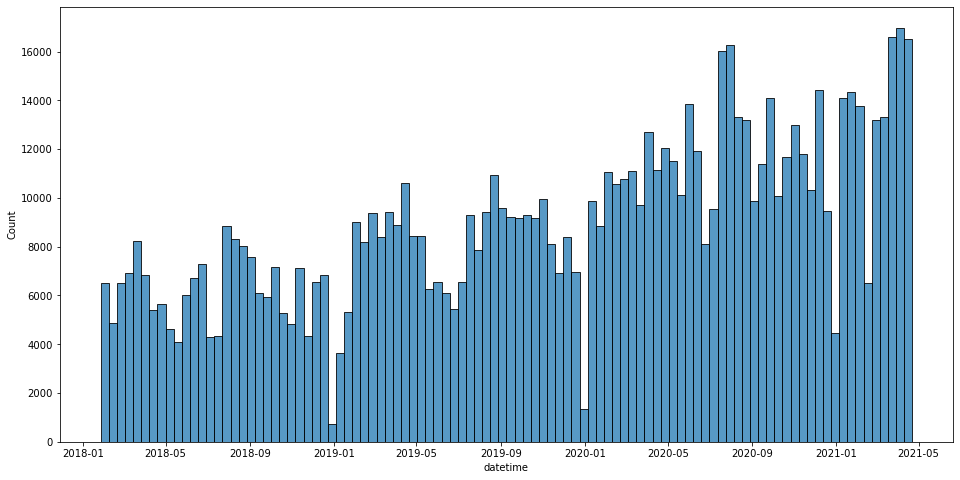

In [92]:
sns.histplot(data=df.index, bins =100)

<AxesSubplot:xlabel='datetime', ylabel='Count'>

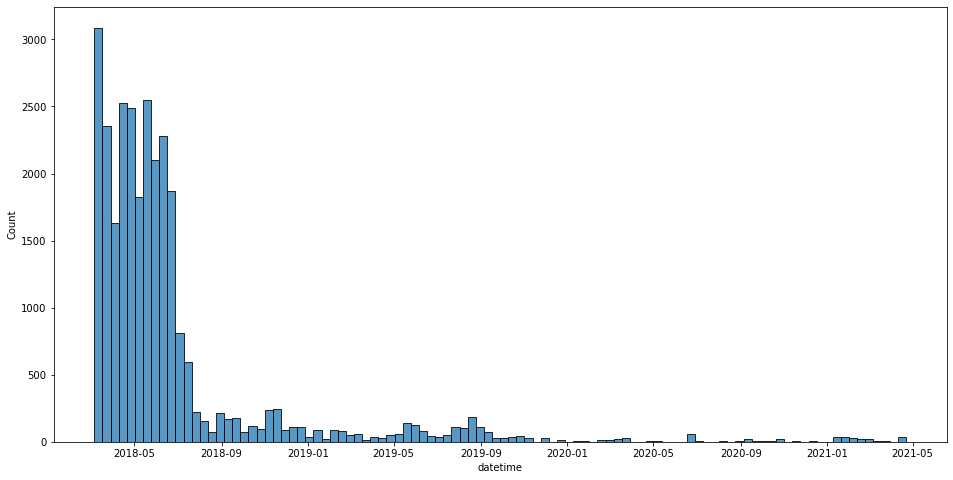

In [128]:
sns.histplot(data=df[df.cohort_id == 23].index, bins =100)

In [121]:
df[df.cohort_id == 23]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-03-05 14:22:48,html-css/css-i,25.0,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2.0
2018-03-05 14:22:58,html-css/forms,25.0,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2.0
2018-03-05 14:23:06,html-css/css-i,25.0,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2.0
2018-03-05 14:23:08,html-css/css-i/introduction,25.0,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2.0
2018-03-05 14:23:47,html-css,25.0,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2.0
...,...,...,...,...,...,...,...,...
2021-04-20 15:31:29,spring,122.0,23.0,69.130.123.181,Ulysses,2018-03-05,2018-07-19,2.0
2021-04-20 17:53:45,javascript-i/functions,126.0,23.0,192.107.1.225,Ulysses,2018-03-05,2018-07-19,2.0
2021-04-21 13:54:53,/,122.0,23.0,134.250.1.82,Ulysses,2018-03-05,2018-07-19,2.0


Shows variation in the access times between no_cohort and df

In [18]:
no_cohort.user_id.value_counts()

354.0    2965
736.0    2358
363.0    2248
716.0    2136
368.0    2085
         ... 
644.0       6
663.0       4
62.0        4
176.0       3
89.0        3
Name: user_id, Length: 78, dtype: int64

Therea are 78 users who have no cohort.

In [19]:
no_cohort.path.value_counts().head(25)

/                                                                            4459
search/search_index.json                                                     1985
javascript-i                                                                  780
toc                                                                           706
spring                                                                        641
java-iii                                                                      567
html-css                                                                      508
java-ii                                                                       508
jquery                                                                        484
javascript-ii                                                                 436
mysql                                                                         422
java-i                                                                        398
Intro_to_Regress

In [20]:
df.name.sort_values().unique()

array(['Andromeda', 'Apex', 'Apollo', 'Arches', 'Badlands', 'Bash',
       'Bayes', 'Betelgeuse', 'Ceres', 'Curie', 'Darden', 'Deimos',
       'Denali', 'Easley', 'Europa', 'Everglades', 'Florence', 'Fortuna',
       'Franklin', 'Ganymede', 'Glacier', 'Hampton', 'Hyperion', 'Ike',
       'Joshua', 'Jupiter', 'Kalypso', 'Kings', 'Lassen', 'Luna',
       'Mammoth', 'Marco', 'Neptune', 'Niagara', 'Oberon', 'Olympic',
       'Pinnacles', 'Quincy', 'Sequoia', 'Staff', 'Teddy', 'Ulysses',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Yosemite', 'Zion', nan],
      dtype=object)

### Exploring other various data before jumping back to my question.

In [21]:
df.program_id.unique()

array([ 1.,  2., nan,  4.,  3.])

In [22]:
df[(df.name == "Ada") | (df.name == 'Bayes')].program_id.unique()

array([3.])

Program id 3 corresponds to Data Science.

In [23]:
df[df.program_id == 3].name.unique()

array(['Bayes', 'Curie', 'Darden', 'Easley', 'Florence'], dtype=object)

Confirmed, according to alumni.codeup.comm these are all DS program students

In [24]:
df[(df.name == "Arches") | (df.name == 'Badlands')].program_id.unique()

array([1.])

Program id 1 corresponds to WebDev

In [25]:
df[df.program_id == 1].name.sort_values().unique()

array(['Arches', 'Badlands', 'Denali', 'Everglades', 'Franklin',
       'Glacier', 'Hampton', 'Ike', 'Joshua', 'Kings', 'Lassen',
       'Olympic', 'Quincy'], dtype=object)

Confirmed, according to alumni.codeup.com these are all WebDev program students

In [26]:
df[df.program_id == 2].name.sort_values().unique()

array(['Andromeda', 'Apex', 'Bash', 'Betelgeuse', 'Ceres', 'Deimos',
       'Europa', 'Fortuna', 'Ganymede', 'Hyperion', 'Jupiter', 'Kalypso',
       'Luna', 'Mammoth', 'Marco', 'Neptune', 'Niagara', 'Oberon',
       'Pinnacles', 'Sequoia', 'Staff', 'Teddy', 'Ulysses', 'Voyageurs',
       'Wrangell', 'Xanadu', 'Yosemite', 'Zion'], dtype=object)

Program 2 corresponds to WebDev program students as confirmed by alumni.codeup.com

In [27]:
df[df.program_id == 4].name.sort_values().unique()

array(['Apollo'], dtype=object)

Program 4 corresponds to WebDev program students as confirmed by alumni.codeup.com

Program id corresponds as follows:
- 1, 2, 4 are all WebDev students
- 3 is Data Scientist students

Based on this information I'm going to split the WebDev students and DS students to see if there is any difference when answering my question.

In [28]:
ds = df[df.program_id == 3]

In [29]:
ds.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-08-20 09:39:58,/,466.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:39:59,/,468.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:39:59,/,467.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:40:02,/,469.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:40:08,/,470.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0


In [30]:
webdev = df[df.program_id != 3]

In [31]:
webdev.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:55:03,/,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:02,java-ii,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2.0,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


# Back to my main question:
### What topics are grads continuing to reference after graduation and into their jobs (for each program)?

Before I do anything I need to remove staff from my exploration as my question specifically pertains to grads.

In [32]:
ds = ds[ds.name != 'Staff']

In [33]:
webdev = webdev[webdev.name != 'Staff']

First I need to explore if these logs refer to access to the curriculum AFTER the graduation date only or for ALL time (even when they were students)

In [34]:
for cohort in df.name.unique():
    print(f"The {cohort} cohort ended on {df[df.name == cohort].end_date.min()} "
          f"and the earliest recorded access was on {df[df.name == cohort].index.min()}\n")

The Hampton cohort ended on 2016-02-06 00:00:00 and the earliest recorded access was on 2018-01-26 09:55:03

The Teddy cohort ended on 2018-05-17 00:00:00 and the earliest recorded access was on 2018-01-26 09:56:24

The Sequoia cohort ended on 2018-02-15 00:00:00 and the earliest recorded access was on 2018-01-26 10:08:22

The Arches cohort ended on 2014-04-22 00:00:00 and the earliest recorded access was on 2018-01-26 10:14:47

The Niagara cohort ended on 2017-03-09 00:00:00 and the earliest recorded access was on 2018-01-26 10:59:02

The Pinnacles cohort ended on 2017-07-20 00:00:00 and the earliest recorded access was on 2018-01-26 11:36:27

The Quincy cohort ended on 2017-09-22 00:00:00 and the earliest recorded access was on 2018-01-26 12:37:53

The nan cohort ended on NaT and the earliest recorded access was on NaT

The Kings cohort ended on 2016-09-15 00:00:00 and the earliest recorded access was on 2018-01-26 21:42:26

The Lassen cohort ended on 2016-11-10 00:00:00 and the earl

This information shows that there is a good portion of the data that occurs PRIOR to students graduation so I need to clean this up and only have logs that show data from after. I will reset this and proceed to analyze.

In [35]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103412 entries, 2019-08-20 09:39:58 to 2021-04-21 16:32:50
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        103411 non-null  object        
 1   user_id     103412 non-null  float64       
 2   cohort_id   103412 non-null  float64       
 3   ip          103412 non-null  object        
 4   name        103412 non-null  object        
 5   start_date  103412 non-null  datetime64[ns]
 6   end_date    103412 non-null  datetime64[ns]
 7   program_id  103412 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 7.1+ MB


In [36]:
ds_after_grad = ds[ds.index > ds.end_date]

In [37]:
ds_after_grad.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11544 entries, 2020-01-30 08:01:31 to 2021-04-21 15:20:18
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   path        11544 non-null  object        
 1   user_id     11544 non-null  float64       
 2   cohort_id   11544 non-null  float64       
 3   ip          11544 non-null  object        
 4   name        11544 non-null  object        
 5   start_date  11544 non-null  datetime64[ns]
 6   end_date    11544 non-null  datetime64[ns]
 7   program_id  11544 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 811.7+ KB


In [38]:
ds_after_grad.shape[0] / ds.shape[0]

0.11163114532162612

Alright, ds_after_grad represents the access logs which occurred after a person graduated for ds students. As a note, it seems that after graduation access of the curriculum only accounts for 11.2% of all access logs; this means that roughly 89% of all the access logs refer to times when the student was enrolled in the program at Codeup.

I will do this now for webdev.

In [39]:
webdev.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 712780 entries, 2018-01-26 09:55:03 to 2021-04-21 16:41:51
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        712780 non-null  object        
 1   user_id     712780 non-null  float64       
 2   cohort_id   659887 non-null  float64       
 3   ip          712780 non-null  object        
 4   name        659887 non-null  object        
 5   start_date  659887 non-null  datetime64[ns]
 6   end_date    659887 non-null  datetime64[ns]
 7   program_id  659887 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 48.9+ MB


In [40]:
wd_after_grad = webdev[webdev.index > webdev.end_date]

In [41]:
wd_after_grad.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104557 entries, 2018-01-26 09:55:03 to 2021-04-21 16:30:30
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        104557 non-null  object        
 1   user_id     104557 non-null  float64       
 2   cohort_id   104557 non-null  float64       
 3   ip          104557 non-null  object        
 4   name        104557 non-null  object        
 5   start_date  104557 non-null  datetime64[ns]
 6   end_date    104557 non-null  datetime64[ns]
 7   program_id  104557 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 7.2+ MB


In [42]:
wd_after_grad.shape[0] / webdev.shape[0]

0.1466890204551194

wd_after_grad represents the access logs which occurred after a person graduated for webdev students. As a note, it seems that after graduation, access of the curriculum only accounts for 14.7% of all access logs; this means that roughly 85% of all the access logs refer to times when the student was enrolled in the program at Codeup.

#### The data is now in a place that I can begin exploring what topics grads are referencing after graduation.

I will explore the webdev group first.

In [43]:
wd_after_grad.path.value_counts().head(10)

/                           7782
javascript-i                3152
spring                      2869
html-css                    2403
search/search_index.json    2341
java-i                      2275
java-ii                     2184
java-iii                    2148
javascript-ii               1988
appendix                    1798
Name: path, dtype: int64

Two of the top five most commonly accessed paths are not indicative of topics. The '/' directory just refers to the base directory from which a student would access the specific curriculum they were looking for and the 'search/search_index.json' paths refers to the search, not an actual topic location. I will drop these two for ease of searching through the data.

In [44]:
wd_after_grad = wd_after_grad[(wd_after_grad.path != '/') & (wd_after_grad.path != 'search/search_index.json')]

In [45]:
wd_after_grad.path.value_counts().head(50)

javascript-i                                                                 3152
spring                                                                       2869
html-css                                                                     2403
java-i                                                                       2275
java-ii                                                                      2184
java-iii                                                                     2148
javascript-ii                                                                1988
appendix                                                                     1798
mysql                                                                        1689
toc                                                                          1663
jquery                                                                       1552
spring/fundamentals/controllers                                              1299
spring/setup    

In [46]:
wd_after_grad[wd_after_grad.path.str.contains('javascript[-/]|javascript$')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 10:14:51,javascript-i,11.0,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0
2018-01-26 10:15:02,javascript-i/functions,11.0,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0
2018-01-26 10:40:15,javascript-i/functions,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 11:36:35,javascript-i,26.0,18.0,97.105.19.61,Pinnacles,2017-03-27,2017-07-20,2.0
2018-01-26 11:36:38,javascript-i/functions,26.0,18.0,97.105.19.61,Pinnacles,2017-03-27,2017-07-20,2.0
...,...,...,...,...,...,...,...,...
2021-04-21 14:42:50,javascript-ii,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:42:51,javascript-ii/es6,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:42:52,javascript-ii/map-filter-reduce,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0


In [47]:
wd_after_grad[wd_after_grad.path.str.contains('java[-/]|_java|java$')].path.unique()

array(['java-ii', 'java-ii/object-oriented-programming', 'java-i',
       'java-iii', 'java-iii/jdbc', 'java-iii/mvc',
       'java-iii/finish-the-adlister',
       'java-iii/deployment-and-dependencies', 'java-iii/servlets',
       'java-iii/jsp-and-jstl', 'java-iii/sessions-and-cookies',
       'java-iii/user-input', 'java-iii/passwords', 'java-i/console-io',
       'java-ii/file-io', 'java-ii/exceptions-and-error-handling',
       'java-ii/collections', 'java-ii/interfaces-and-abstract-classes',
       'java-ii/arrays', 'java-ii/annotations',
       'appendix/further-reading/java/intellij-tomcat-configuration',
       'java-i/introduction-to-java', 'slides/introduction_to_java',
       'java-ii/inheritance-and-polymorphism',
       'java-i/syntax-types-and-variables',
       'java-i/control-statements-and-loops', 'java-i/methods',
       'java-i/strings', 'examples/java/MoviesArray.java',
       'appendix/code-standards/java', 'java-ii/file-op',
       'introduction-to-java', 'java-

In [48]:
wd_after_grad[wd_after_grad.path.str.contains('css')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-27 07:28:04,content/html-css,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-27 07:28:09,content/html-css/elements.html,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-27 07:29:07,content/html-css/forms.html,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-27 15:54:00,content/html-css,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-27 15:54:23,content/html-css/introduction.html,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
...,...,...,...,...,...,...,...,...
2021-04-21 12:21:16,html-css/elements,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:42:41,html-css/css-ii/media-queries,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:42:43,html-css/css-ii/bootstrap-introduction,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0


In [49]:
wd_after_grad[wd_after_grad.path.str.contains('sql')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-27 07:27:52,content/mysql/intro-to-mysql/users.html,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-29 13:51:04,mysql/users,64.0,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0
2018-01-29 15:06:28,mysql/database-design,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-29 15:07:31,mysql/database-design,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-29 16:26:22,mysql/database-design,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
...,...,...,...,...,...,...,...,...
2021-04-21 12:57:13,mysql,655.0,58.0,107.128.2.166,Hyperion,2020-05-26,2020-11-10,2.0
2021-04-21 12:57:18,mysql/introduction,655.0,58.0,107.128.2.166,Hyperion,2020-05-26,2020-11-10,2.0
2021-04-21 12:57:40,mysql/users,655.0,58.0,107.128.2.166,Hyperion,2020-05-26,2020-11-10,2.0


In [50]:
wd_after_grad[wd_after_grad.path.str.contains('php')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-28 16:15:17,content/php_i,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-28 16:15:20,content/php_i/intro-via-interactive-shell,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-28 16:15:56,content/php_i/intro-via-interactive-shell/hell...,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-28 16:16:06,content/php_i/intro-via-interactive-shell/doin...,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-28 16:16:15,content/php_ii,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
...,...,...,...,...,...,...,...,...
2021-02-18 05:42:42,content/php_i/intro-via-interactive-shell,51.0,13.0,70.122.42.101,Kings,2016-05-23,2016-09-15,1.0
2021-03-03 23:51:30,content/php_i,80.0,14.0,136.50.29.193,Lassen,2016-07-18,2016-11-10,1.0
2021-03-31 13:26:43,content/php_iv,210.0,17.0,71.238.72.160,Olympic,2017-02-06,2017-05-25,1.0


In [51]:
wd_after_grad[wd_after_grad.path.str.contains('spring')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 13:57:51,spring/extra-features/file-upload,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 11:05:52,spring,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 11:05:55,spring/extra-features/json-response,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 11:34:58,spring,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 11:35:16,spring/fundamentals/controllers,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
...,...,...,...,...,...,...,...,...
2021-04-20 15:31:29,spring,122.0,23.0,69.130.123.181,Ulysses,2018-03-05,2018-07-19,2.0
2021-04-20 20:39:53,spring,773.0,62.0,70.121.201.159,Jupiter,2020-09-21,2021-03-30,2.0
2021-04-20 20:39:56,spring/setup,773.0,62.0,70.121.201.159,Jupiter,2020-09-21,2021-03-30,2.0


In [52]:
wd_after_grad[wd_after_grad.path.str.contains('jquery')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-29 09:28:24,jquery,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 09:28:31,jquery/ajax,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 09:31:01,jquery/ajax/requests-and-responses,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 13:45:56,jquery,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 13:50:49,jquery/ajax,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
...,...,...,...,...,...,...,...,...
2021-04-21 14:43:06,jquery/essential-methods/traversing,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:43:07,jquery/ajax,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:43:08,jquery/ajax/requests-and-responses,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0


In [53]:
wd_after_grad.path.value_counts().tail(60)

prework/cli/07-editing-files-with-vim                            1
content/appendix/javascript/functions/scope.html                 1
cohorts/24/grades                                                1
quiz                                                             1
capstone-workbook                                                1
python/control-structures                                        1
sql/mysql-overview                                               1
syntax-types-and-variables                                       1
further-reading/html-css/flexbox-additional-concepts             1
content/mysql/intro-to-mysql/index.html                          1
java-ii/file-op                                                  1
datascience                                                      1
7.04.01_Partitioning                                             1
mysql/java-iii                                                   1
7-classification/confusion-matrix                             

Most of these seem to be ds topics or other random page I will categorize as one catch all "random" category.

Going to make a dataframe which contains all this info about topic and amount of requests


In [54]:
wd_results = {'topic': ['javascript', 'java', 'css', 'spring', 'sql', 'jquery', 'appendix', 'capstone', 'random/ds_topics'], 
              'num_times_accessed': [wd_after_grad[wd_after_grad.path.str.contains('javascript[-/]|javascript$')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('java[-/]|_java|java$')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('css')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('spring')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('sql')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('jquery')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('appendix')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('capstone')].shape[0],
                                wd_after_grad.shape[0]- wd_after_grad[wd_after_grad.path.str.contains('java|sql|jquery|spring|css|appendix|capstone|toc')].shape[0]]}

In [55]:
wd_results_df = pd.DataFrame(wd_results).sort_values('num_times_accessed', ascending=False)

<AxesSubplot:xlabel='topic', ylabel='num_times_accessed'>

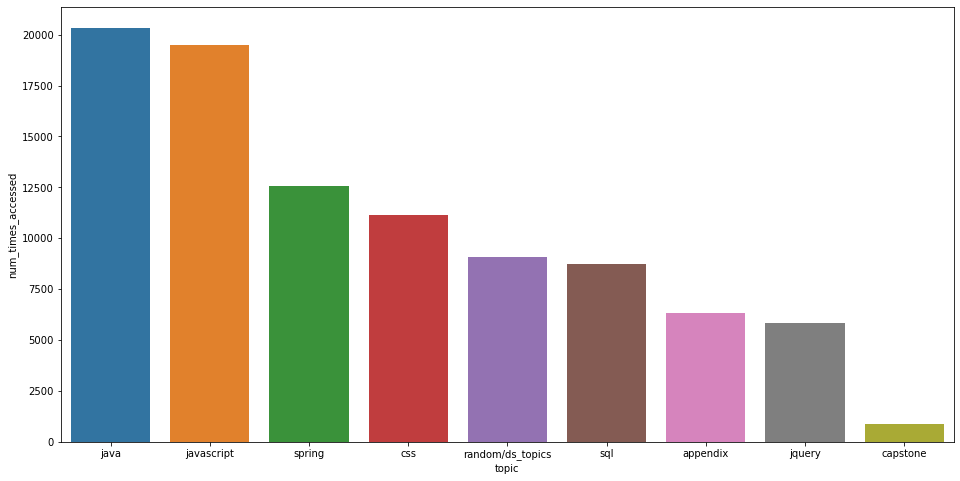

In [56]:
sns.barplot(data= wd_results_df, x = 'topic', y = 'num_times_accessed')

In [57]:
wd_results_df

,topic,num_times_accessed
1,java,20341
0,javascript,19512
3,spring,12557
2,css,11150
8,random/ds_topics,9064
4,sql,8746
6,appendix,6333
5,jquery,5862
7,capstone,859


In [58]:
wd_after_grad.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94434 entries, 2018-01-26 09:56:02 to 2021-04-21 16:30:30
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   path        94434 non-null  object        
 1   user_id     94434 non-null  float64       
 2   cohort_id   94434 non-null  float64       
 3   ip          94434 non-null  object        
 4   name        94434 non-null  object        
 5   start_date  94434 non-null  datetime64[ns]
 6   end_date    94434 non-null  datetime64[ns]
 7   program_id  94434 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 6.5+ MB


In [59]:
wd_after_grad[wd_after_grad.path.str.contains('java[-/]|_java|java$')].shape[0] / wd_after_grad.shape[0]

0.21539911472562848

In [60]:
wd_after_grad[wd_after_grad.path.str.contains('javascript[-/]|javascript$')].shape[0] / wd_after_grad.shape[0]

0.20662049685494632

In [61]:
wd_after_grad[wd_after_grad.path.str.contains('spring')].shape[0] / wd_after_grad.shape[0]

0.13297117563589386

This shows that the most broad topics accessed after graduation are java and javascript. 
- Java accounted for 21.5% of all content accessed.
- Javascript account for 20.6% of all content accessed.


I will get a bit more granular next.

In [62]:
wd_after_grad[wd_after_grad.path.str.contains('java[-/]|_java|java$')].path.value_counts().head(50)

java-i                                                         2275
java-ii                                                        2184
java-iii                                                       2148
java-i/introduction-to-java                                     894
java-i/syntax-types-and-variables                               847
java-ii/object-oriented-programming                             822
java-iii/servlets                                               811
java-iii/jsp-and-jstl                                           752
java-i/console-io                                               688
java-i/methods                                                  674
java-ii/inheritance-and-polymorphism                            634
java-ii/arrays                                                  632
java-i/control-statements-and-loops                             627
java-iii/jdbc                                                   588
java-iii/mvc                                    

For java we see the single largest subtopic being the java-i main directory at 2275 entries and second the java-ii main directory at 2184 entries; the largest specific sub-topics are java-i/introduction-to-java at 894 entries, java-i/syntax-types-and-variables 847 entries, /object-oriented-programming at 822, and /servlets at 811.

In [63]:
wd_after_grad[wd_after_grad.path.str.contains('javascript[-/]|javascript$')].path.value_counts().head(50)

javascript-i                                                                 3152
javascript-ii                                                                1988
javascript-i/functions                                                        785
javascript-i/javascript-with-html                                             775
javascript-i/loops                                                            644
javascript-ii/promises                                                        625
javascript-i/conditionals                                                     613
javascript-ii/es6                                                             611
javascript-i/introduction/working-with-data-types-operators-and-variables     577
javascript-i/bom-and-dom/dom                                                  575
javascript-ii/ajax-api                                                        575
javascript-ii/npm                                                             568
javascript-ii/ma

For javascript we have the single largest subtopic being the javascript-i main directory at 3152 entries and second being the javascript-ii main directory at 1988 entries; the largest specifc sub-topics are javascript-i/functions at 785 entries and javascript-i/javascript-with-html 775 entries.

In [64]:
wd_after_grad[wd_after_grad.path.str.contains('spring')].path.value_counts().head(50)

spring                                                    2869
spring/fundamentals/controllers                           1299
spring/setup                                              1236
spring/fundamentals/views                                 1166
spring/fundamentals/repositories                          1073
spring/fundamentals/form-model-binding                     737
spring/fundamentals/relationships                          709
spring/fundamentals/security/authentication                698
spring/fundamentals/services                               631
spring/fundamentals/security                               391
spring/extra-features/json-response                        285
spring/extra-features/form-validation                      238
spring/extra-features/file-upload                          221
spring/extra-features/error-pages                          157
appendix/further-reading/spring/authorization              157
appendix/further-reading/spring/devtools-configuration 

For spring we have the single largest subtopic being the spring main directory at 2869; the largest specifc sub-topics are /fundamentals/controllers at 1299 entries, /setup with 1236 entries, fundamentals/views at 1166 entries, and /fundamentals/repositories at 1073 entries.

In [65]:
wd_after_grad[wd_after_grad.path.str.contains('css')].path.value_counts().head(50)

html-css                                                          2403
html-css/elements                                                  937
html-css/introduction                                              800
html-css/forms                                                     671
html-css/css-i/selectors-and-properties                            466
html-css/css-ii/bootstrap-grid-system                              443
html-css/css-ii/bootstrap-introduction                             440
html-css/css-i/box-model                                           430
html-css/css-i/positioning                                         399
html-css/css-ii/media-queries                                      398
html-css/css-i/introduction                                        368
jquery/essential-methods/attributes-and-css                        319
content/html-css                                                   304
html-css/css-i/flexbox/flexbox-fundamentals                        274
html-c

For css we have the single largest subtopic being the html-css main directory at 2403; the largest specifc sub-topics are /elements at 937 entries, and /introduction at 800 entries.

In [66]:
wd_after_grad[wd_after_grad.path.str.contains('sql')].path.value_counts().head(50)

mysql                                                        1689
mysql/introduction                                            665
mysql/users                                                   615
mysql/tables                                                  575
mysql/basic-statements                                        574
mysql/databases                                               573
mysql/relationships/joins                                     362
mysql/sample-database                                         334
mysql/database-design                                         304
mysql/functions                                               286
mysql/intellij                                                285
mysql/group-by                                                274
mysql/clauses/where                                           251
mysql/relationships/indexes                                   218
mysql/aliases                                                 210
mysql/rela

No single specific subtopic over 800 entries for sql.

In [67]:
wd_after_grad[wd_after_grad.path.str.contains('jquery')].path.value_counts().head(50)

jquery                                                         1552
jquery/ajax/requests-and-responses                              534
jquery/selectors                                                423
jquery/introduction                                             371
jquery/ajax/weather-map                                         347
jquery/ajax                                                     340
jquery/essential-methods/attributes-and-css                     319
jquery/effects                                                  310
jquery/events/mouse-events                                      296
jquery/essential-methods/traversing                             294
jquery/events/keyboard-events                                   229
jquery/personal-site                                            181
jquery/events                                                   179
jquery/simple-simon                                             128
jquery/whack-a-mole/create-game                 

In [68]:
wd_after_grad[wd_after_grad.path.str.contains('appendix')].path.value_counts().head(50)

appendix                                                       1798
appendix/capstone-workbook                                      277
appendix/further-reading/java/intellij-tomcat-configuration     185
appendix/professional-development/mock-behavioral-questions     183
appendix/git/cli                                                170
appendix/git/intellij                                           163
appendix/further-reading/spring/authorization                   157
appendix/professional-development/cover-letter                  136
appendix/further-reading/spring/devtools-configuration          135
appendix/documentation                                          130
appendix/slides                                                 126
appendix/git/intellij-intro                                     120
appendix/extra-challenges/basic-challenges                      116
appendix/further-reading/spring/pagination                      105
appendix/further-reading/spring/security-use-cas

No specific sub-topic breaks 800 entries in jquery or appendix.

In [69]:
# Making a dataframe to contain the most accessed subtopics
sub_topics_list = ['java-i/introduction-to-java', 
                   'java-i/syntax-types-and-variables', 
                   'java-ii/object-oriented-programming', 
                   'java-iii/servlets', 
                   'javascript-i/functions', 
                   'javascript-i/javascript-with-html', 
                   'spring/fundamentals/controllers', 
                   'spring/setup', 
                   'spring/fundamentals/views',
                   'spring/fundamentals/repositories',
                   'html-css/elements',
                   'html-css/introduction']
occurances_list = [894, 847, 822, 811, 785, 775, 1299, 1236, 1166, 1073, 937, 800]
wd_subtopics = {'subtopic': sub_topics_list, 'num_times_accessed': occurances_list}

In [70]:
wd_subtopics

{'subtopic': ['java-i/introduction-to-java',
  'java-i/syntax-types-and-variables',
  'java-ii/object-oriented-programming',
  'java-iii/servlets',
  'javascript-i/functions',
  'javascript-i/javascript-with-html',
  'spring/fundamentals/controllers',
  'spring/setup',
  'spring/fundamentals/views',
  'spring/fundamentals/repositories',
  'html-css/elements',
  'html-css/introduction'],
 'num_times_accessed': [894,
  847,
  822,
  811,
  785,
  775,
  1299,
  1236,
  1166,
  1073,
  937,
  800]}

In [71]:
wd_subtopics_df = pd.DataFrame(wd_subtopics).sort_values('num_times_accessed', ascending=False)
wd_subtopics_df

,subtopic,num_times_accessed
6,spring/fundamentals/controllers,1299
7,spring/setup,1236
8,spring/fundamentals/views,1166
9,spring/fundamentals/repositories,1073
10,html-css/elements,937
0,java-i/introduction-to-java,894
1,java-i/syntax-types-and-variables,847
2,java-ii/object-oriented-programming,822
3,java-iii/servlets,811
11,html-css/introduction,800


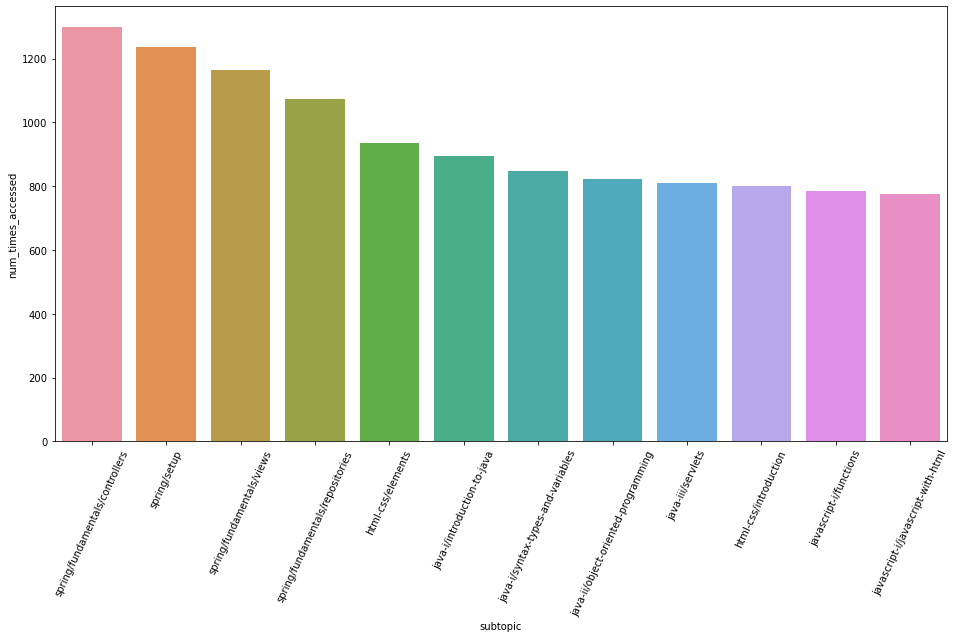

In [72]:
ax = sns.barplot(data= wd_subtopics_df, x = 'subtopic', y = 'num_times_accessed')
plt.xticks(rotation=65)
plt.show()

## WebDev takeaways

- Java and Javascript were by far the largest categories represented in the main topics
    - Java accounted for 21.5% of all content accessed.
    - Javascript account for 20.6% of all content accessed.
- Spring however had the most subtopics represented in the top subtopic categories.
    - Top 4 single lessons were over Spring
        - spring/fundamentals/controllers
        - spring/setup
        - spring/fundamentals/views
        - spring/fundamentals/repositories

In [73]:
ds_after_grad = ds_after_grad[(ds_after_grad.path != '/') & (ds_after_grad.path != 'search/search_index.json')]
ds_after_grad

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-01-30 08:01:31,1-fundamentals/1.1-intro-to-data-science,485.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2020-01-30 08:01:32,1-fundamentals/modern-data-scientist.jpg,485.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2020-01-30 08:01:32,1-fundamentals/AI-ML-DL-timeline.jpg,485.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2020-01-31 11:05:13,1-fundamentals/AI-ML-DL-timeline.jpg,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-01-31 11:05:13,1-fundamentals/1.1-intro-to-data-science,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-04-21 15:20:12,classification/scale_features_or_not.svg,692.0,59.0,96.8.130.134,Darden,2020-07-13,2021-01-12,3.0
2021-04-21 15:20:12,classification/classical_programming_vs_machin...,692.0,59.0,96.8.130.134,Darden,2020-07-13,2021-01-12,3.0
2021-04-21 15:20:12,classification/overview,692.0,59.0,96.8.130.134,Darden,2020-07-13,2021-01-12,3.0


In [74]:
ds_after_grad.path.value_counts().tail(60)

storytelling/creating-custom-fields.md           1
10-anomaly-detection/isolation-forests           1
2-storytelling/bad-charts                        1
prepare                                          1
2-storytelling/2.2-create                        1
DataToAction_v2.jpg                              1
9-timeseries/sarimax                             1
4-python/7.1-ds-libraries-overview               1
python/handling-duplicate-values                 1
advanced-topics/tidy-data                        1
fundamentals/intro-to-data-science.md            1
sql/mysql-introduction.md                        1
individual-project/individual-project            1
2-storytelling/3.6-creating-stories              1
distributed-ml/read-jdbc                         1
fundamentals/cli/navigating-the-filesystem.md    1
classification/project-old-exec                  1
python/introduction-to-python.md                 1
cli/moving-files                                 1
11-nlp/pos-tagging             

In [75]:
ds_after_grad[ds_after_grad.path.str.contains('sql')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-01-31 14:47:26,3-sql/1-mysql-overview,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-01-31 14:47:27,3-sql/2-mysql-introduction,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-01-31 14:47:28,3-sql/3-databases,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-01-31 14:47:35,3-sql/4-tables,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-01-31 14:47:55,3-sql/5-basic-statements,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-04-20 14:44:00,sql/mysql-overview,580.0,55.0,185.247.70.173,Curie,2020-02-03,2020-07-07,3.0
2021-04-20 14:44:17,sql/mysql-overview,580.0,55.0,185.247.70.173,Curie,2020-02-03,2020-07-07,3.0
2021-04-20 14:44:36,sql/mysql-introduction,580.0,55.0,185.247.70.173,Curie,2020-02-03,2020-07-07,3.0


In [76]:
ds_after_grad[ds_after_grad.path.str.contains('python')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-01-31 14:47:20,4-python/7.4.4-advanced-dataframes,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-05 12:14:16,4-python/7.4.4-advanced-dataframes,473.0,34.0,76.184.210.61,Bayes,2019-08-19,2020-01-30,3.0
2020-02-06 22:11:43,4-python/intro-to-sklearn,481.0,34.0,107.132.82.186,Bayes,2019-08-19,2020-01-30,3.0
2020-02-08 15:00:46,4-python/pandas-time-series,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-15 19:30:57,4-python/1-overview,358.0,34.0,65.43.118.72,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-04-21 10:02:52,python/data-types-and-variables,692.0,59.0,96.8.130.134,Darden,2020-07-13,2021-01-12,3.0
2021-04-21 11:00:06,python/advanced-dataframes,485.0,34.0,173.174.142.84,Bayes,2019-08-19,2020-01-30,3.0
2021-04-21 11:44:36,python/control-structures,692.0,59.0,96.8.130.134,Darden,2020-07-13,2021-01-12,3.0


In [77]:
ds_after_grad[ds_after_grad.path.str.contains('classification')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-02-03 16:17:37,7-classification/project,485.0,34.0,67.78.73.114,Bayes,2019-08-19,2020-01-30,3.0
2020-02-04 17:56:05,7-classification/5-evaluation,479.0,34.0,172.14.106.31,Bayes,2019-08-19,2020-01-30,3.0
2020-02-04 18:01:22,7-classification/5-evaluation,479.0,34.0,172.14.106.31,Bayes,2019-08-19,2020-01-30,3.0
2020-02-05 14:38:25,7-classification/1-overview,482.0,34.0,172.124.64.127,Bayes,2019-08-19,2020-01-30,3.0
2020-02-05 22:36:12,7-classification/3-prep,469.0,34.0,173.232.243.3,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-04-21 15:20:12,classification/scale_features_or_not.svg,692.0,59.0,96.8.130.134,Darden,2020-07-13,2021-01-12,3.0
2021-04-21 15:20:12,classification/classical_programming_vs_machin...,692.0,59.0,96.8.130.134,Darden,2020-07-13,2021-01-12,3.0
2021-04-21 15:20:12,classification/overview,692.0,59.0,96.8.130.134,Darden,2020-07-13,2021-01-12,3.0


In [78]:
ds_after_grad[ds_after_grad.path.str.contains('anomaly')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-02-03 09:47:28,10-anomaly-detection/1-overview,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 09:47:28,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 09:47:37,10-anomaly-detection/1-overview,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 09:47:37,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-04 15:04:26,10-anomaly-detection/1-overview,478.0,34.0,107.77.217.70,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-04-09 11:04:56,anomaly-detection/AnomalyDetectionCartoon.jpeg,781.0,59.0,108.239.188.205,Darden,2020-07-13,2021-01-12,3.0
2021-04-12 17:09:39,anomaly-detection/overview,682.0,59.0,107.13.184.11,Darden,2020-07-13,2021-01-12,3.0
2021-04-12 17:09:39,anomaly-detection/AnomalyDetectionCartoon.jpeg,682.0,59.0,107.13.184.11,Darden,2020-07-13,2021-01-12,3.0


In [79]:
ds_after_grad[ds_after_grad.path.str.contains('fundamentals', case = False)]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-01-30 08:01:31,1-fundamentals/1.1-intro-to-data-science,485.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2020-01-30 08:01:32,1-fundamentals/modern-data-scientist.jpg,485.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2020-01-30 08:01:32,1-fundamentals/AI-ML-DL-timeline.jpg,485.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2020-01-31 11:05:13,1-fundamentals/AI-ML-DL-timeline.jpg,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-01-31 11:05:13,1-fundamentals/1.1-intro-to-data-science,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-04-20 18:52:09,fundamentals/cli/overview,469.0,34.0,108.199.116.156,Bayes,2019-08-19,2020-01-30,3.0
2021-04-20 18:52:22,fundamentals/cli/intro,469.0,34.0,108.199.116.156,Bayes,2019-08-19,2020-01-30,3.0
2021-04-20 18:55:49,fundamentals/cli/listing-files,469.0,34.0,108.199.116.156,Bayes,2019-08-19,2020-01-30,3.0


In [80]:
ds_after_grad[ds_after_grad.path.str.contains('clustering')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-01-31 20:05:13,8-clustering/Hospital-Distance-Clusters.jpg,471.0,34.0,99.158.247.1,Bayes,2019-08-19,2020-01-30,3.0
2020-01-31 20:05:13,8-clustering/2-about,471.0,34.0,99.158.247.1,Bayes,2019-08-19,2020-01-30,3.0
2020-02-04 14:51:24,8-clustering/5.1-kmeans-part-1,466.0,34.0,70.226.110.58,Bayes,2019-08-19,2020-01-30,3.0
2020-02-04 14:51:43,8-clustering/5.2-kmeans-part-2,466.0,34.0,70.226.110.58,Bayes,2019-08-19,2020-01-30,3.0
2020-02-04 15:31:07,8-clustering/project,478.0,34.0,107.77.217.142,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-04-20 14:28:43,clustering/explore,485.0,34.0,173.174.142.84,Bayes,2019-08-19,2020-01-30,3.0
2021-04-20 14:28:48,clustering/using-clusters,485.0,34.0,173.174.142.84,Bayes,2019-08-19,2020-01-30,3.0
2021-04-20 14:28:48,clustering/now_what.jpg,485.0,34.0,173.174.142.84,Bayes,2019-08-19,2020-01-30,3.0


In [81]:
ds_after_grad[ds_after_grad.path.str.contains('timeseries')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-02-02 14:20:34,9-timeseries/project,485.0,34.0,67.78.73.114,Bayes,2019-08-19,2020-01-30,3.0
2020-02-04 15:04:37,9-timeseries/5.1-modeling-lesson1,478.0,34.0,107.77.217.70,Bayes,2019-08-19,2020-01-30,3.0
2020-02-04 15:06:53,9-timeseries/project,478.0,34.0,107.77.217.70,Bayes,2019-08-19,2020-01-30,3.0
2020-02-04 15:07:17,9-timeseries/5.1-modeling-lesson1,478.0,34.0,107.77.217.70,Bayes,2019-08-19,2020-01-30,3.0
2020-02-04 15:07:20,9-timeseries/5.2-modeling-lesson2,478.0,34.0,107.77.217.70,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-04-20 14:59:00,timeseries/project,683.0,59.0,173.174.172.52,Darden,2020-07-13,2021-01-12,3.0
2021-04-20 14:59:22,timeseries/modeling-lesson1,683.0,59.0,173.174.172.52,Darden,2020-07-13,2021-01-12,3.0
2021-04-20 14:59:25,timeseries/prep,683.0,59.0,173.174.172.52,Darden,2020-07-13,2021-01-12,3.0


In [82]:
ds_after_grad[ds_after_grad.path.str.contains('appendix')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-02-03 09:47:24,appendix/cli-git-overview,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 09:47:42,appendix/cli-git-overview,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 09:47:46,appendix/cli-git-overview,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 09:47:49,appendix/cli-git-overview,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 09:47:51,appendix/git,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-04-19 10:07:07,appendix/data_science_community,859.0,59.0,98.6.75.74,Darden,2020-07-13,2021-01-12,3.0
2021-04-19 10:15:09,appendix/data_science_community,859.0,59.0,98.6.75.74,Darden,2020-07-13,2021-01-12,3.0
2021-04-19 14:00:32,appendix/professional-development/t-block-less...,683.0,59.0,67.11.157.23,Darden,2020-07-13,2021-01-12,3.0


In [83]:
ds_after_grad[ds_after_grad.path.str.contains('nlp')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-02-02 16:23:09,11-nlp/project,485.0,34.0,67.78.73.114,Bayes,2019-08-19,2020-01-30,3.0
2020-02-02 16:23:09,11-nlp/github_repo_language.gif,485.0,34.0,67.78.73.114,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 13:31:49,11-nlp/4-prepare,485.0,34.0,67.78.73.114,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 13:33:39,11-nlp/6-model,485.0,34.0,67.78.73.114,Bayes,2019-08-19,2020-01-30,3.0
2020-02-05 10:21:57,11-nlp/1-overview,472.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-04-03 14:58:40,nlp/regular-expressions,690.0,59.0,104.219.136.26,Darden,2020-07-13,2021-01-12,3.0
2021-04-12 17:09:45,nlp/regular-expressions,682.0,59.0,107.13.184.11,Darden,2020-07-13,2021-01-12,3.0
2021-04-18 15:36:41,nlp/prepare,690.0,59.0,104.219.136.26,Darden,2020-07-13,2021-01-12,3.0


In [84]:
ds_after_grad[ds_after_grad.path.str.contains('regression')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-02-02 13:55:01,6-regression/7.0-model,485.0,34.0,67.78.73.114,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 09:47:26,6-regression/1-overview,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 09:47:38,6-regression/1-overview,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 09:47:40,6-regression/1-overview,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-03 09:47:41,6-regression/1-overview,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-04-06 10:27:04,regression/evaluate,683.0,59.0,67.11.157.23,Darden,2020-07-13,2021-01-12,3.0
2021-04-06 10:37:21,regression/model,683.0,59.0,67.11.157.23,Darden,2020-07-13,2021-01-12,3.0
2021-04-06 16:11:55,regression/project,485.0,34.0,173.174.142.84,Bayes,2019-08-19,2020-01-30,3.0


In [85]:
ds_after_grad[ds_after_grad.path.str.contains('stats')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-02-05 13:45:55,5-stats/1-overview,481.0,34.0,107.132.82.186,Bayes,2019-08-19,2020-01-30,3.0
2020-02-05 13:51:23,5-stats/2-simulation,481.0,34.0,107.132.82.186,Bayes,2019-08-19,2020-01-30,3.0
2020-02-06 22:11:55,5-stats/sampling,481.0,34.0,107.132.82.186,Bayes,2019-08-19,2020-01-30,3.0
2020-02-06 22:12:01,5-stats/distributions-and-testing,481.0,34.0,107.132.82.186,Bayes,2019-08-19,2020-01-30,3.0
2020-02-07 10:04:00,5-stats/4.5-more-statistical-testing-examples,473.0,34.0,76.184.210.61,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-04-05 10:49:03,stats/Selecting_a_hypothesis_test.svg,585.0,55.0,192.171.119.178,Curie,2020-02-03,2020-07-07,3.0
2021-04-14 14:38:07,stats/compare-means,682.0,59.0,107.13.184.11,Darden,2020-07-13,2021-01-12,3.0
2021-04-16 19:28:04,stats/probability-distributions,692.0,59.0,96.8.130.134,Darden,2020-07-13,2021-01-12,3.0


In [86]:
ds_after_grad[ds_after_grad.path.str.contains('capstone')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2021-03-05 14:35:28,capstones/capstones,485.0,34.0,173.174.142.84,Bayes,2019-08-19,2020-01-30,3.0
2021-03-27 11:32:01,capstones/capstones,859.0,59.0,98.6.75.74,Darden,2020-07-13,2021-01-12,3.0
2021-03-27 11:36:50,capstones/capstones,859.0,59.0,98.6.75.74,Darden,2020-07-13,2021-01-12,3.0
2021-03-27 11:38:48,capstones/capstones,859.0,59.0,98.6.75.74,Darden,2020-07-13,2021-01-12,3.0
2021-03-27 11:38:56,capstones/capstones,859.0,59.0,98.6.75.74,Darden,2020-07-13,2021-01-12,3.0
2021-03-27 11:46:31,capstones/capstones,859.0,59.0,98.6.75.74,Darden,2020-07-13,2021-01-12,3.0
2021-03-30 13:50:24,capstones/capstones,617.0,55.0,70.40.28.157,Curie,2020-02-03,2020-07-07,3.0
2021-04-20 21:25:19,capstones/capstones,478.0,34.0,67.11.138.10,Bayes,2019-08-19,2020-01-30,3.0


In [87]:
ds_after_grad[ds_after_grad.path.str.contains('storytelling')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-02-03 16:12:26,2-storytelling/project,485.0,34.0,67.78.73.114,Bayes,2019-08-19,2020-01-30,3.0
2020-02-11 13:13:42,2-storytelling/project,478.0,34.0,67.11.138.10,Bayes,2019-08-19,2020-01-30,3.0
2020-02-20 19:52:41,2-storytelling/project,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-28 09:34:56,2-storytelling/3-tableau,480.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2020-02-28 15:50:01,2-storytelling/project,482.0,34.0,172.124.64.127,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-03-13 10:50:13,storytelling/tableau,691.0,59.0,66.69.72.41,Darden,2020-07-13,2021-01-12,3.0
2021-03-15 09:58:43,storytelling/overview,691.0,59.0,66.69.72.41,Darden,2020-07-13,2021-01-12,3.0
2021-03-15 10:01:39,storytelling/understand,691.0,59.0,66.69.72.41,Darden,2020-07-13,2021-01-12,3.0


In [88]:
ds_after_grad[ds_after_grad.path.str.contains('spark')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-02-03 16:18:56,12-distributed-ml/3-spark-api,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-04 11:22:50,12-distributed-ml/3-spark-api,476.0,34.0,24.73.246.228,Bayes,2019-08-19,2020-01-30,3.0
2020-02-04 11:46:54,12-distributed-ml/3-spark-api,476.0,34.0,24.73.246.228,Bayes,2019-08-19,2020-01-30,3.0
2020-02-05 19:33:36,12-distributed-ml/spark-local-mode.svg,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
2020-02-05 19:33:36,12-distributed-ml/spark-execution-diagram.svg,476.0,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2021-03-05 09:53:23,distributed-ml/spark-api,485.0,34.0,173.174.142.84,Bayes,2019-08-19,2020-01-30,3.0
2021-03-13 00:03:12,distributed-ml/spark-execution-diagram.svg,785.0,59.0,72.181.127.233,Darden,2020-07-13,2021-01-12,3.0
2021-03-13 00:03:12,distributed-ml/spark-local-mode.svg,785.0,59.0,72.181.127.233,Darden,2020-07-13,2021-01-12,3.0


In [89]:
ds_after_grad[ds_after_grad.path.str.contains('capstone|sql|python|stats|fundamentals|regression|clustering|nlp|appendix|timeseries|anomaly|classification|spark|python|storytelling')]



KeyboardInterrupt: 

In [ ]:
ds_results = {'topic': ['capstone','sql','python', 'stats', 'fundamentals', 'regression', 'clustering', 'nlp', 'appendix', 'timeseries', 'anomaly', 'classification', 'spark', 'python', 'storytelling','other_topics'], 
              'num_times_accessed': [ds_after_grad[ds_after_grad.path.str.contains('capstone', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('sql', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('python', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('stats', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('fundamentals', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('regression', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('clustering', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('nlp', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('appendix', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('timeseries', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('anomaly', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('classification', case = False)].shape[0], 
                                ds_after_grad[ds_after_grad.path.str.contains('spark', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('python', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('storytelling', case = False)].shape[0],
                                ds_after_grad.shape[0]- ds_after_grad[ds_after_grad.path.str.contains('capstone|sql|python|stats|fundamentals|regression|clustering|nlp|appendix|timeseries|anomaly|classification|spark|python|storytelling')].shape[0]]}

In [ ]:
ds_results_df = pd.DataFrame(ds_results).sort_values('num_times_accessed', ascending=False)

In [ ]:
ds_results_df

In [ ]:
sns.barplot(data= ds_results_df, x = 'topic', y = 'num_times_accessed')

This shows that the most broad topics accessed after graduation are sql, fundamentals and classification. I will get a bit more granular next.

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('sql')].path.value_counts().head(15)

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('fundamentals')].path.value_counts().head(10)

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('classification')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('python')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('regression')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('anomaly')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('appendix')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('stats')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('timeseries')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('nlp')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('clustering')].path.value_counts().head()

In [ ]:
# Making a dataframe to contain the most accessed subtopics
sub_topics_list = ['sql/mysql-overview', 
                   'sql/database-design', 
                   'fundamentals/AI-ML-DL-timeline.jpg', 
                   'fundamentals/modern-data-scientist.jpg', 
                   'fundamentals/intro-to-data-science', 
                   '1-fundamentals/modern-data-scientist.jpg', 
                   '1-fundamentals/1.1-intro-to-data-science', 
                   'classification/overview', 
                   'classification/scale_features_or_not.svg',
                   '6-regression/1-overview',
                   'anomaly-detection/AnomalyDetectionCartoon.jpeg',
                   'anomaly-detection/overview']
occurances_list = [275, 87, 189, 187, 184, 128, 127, 267, 220, 86, 193, 191]
wd_subtopics = {'subtopic': sub_topics_list, 'num_times_accessed': occurances_list}

In [ ]:
ds_subtopics_df = pd.DataFrame(wd_subtopics).sort_values('num_times_accessed', ascending=False)
ds_subtopics_df

In [ ]:
ax = sns.barplot(data= ds_subtopics_df, x = 'subtopic', y = 'num_times_accessed')
plt.xticks(rotation=65)
plt.show()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('sql')].shape[0] / ds_after_grad.shape[0]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('fundamentals')].shape[0] / ds_after_grad.shape[0]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('classification')].shape[0] / ds_after_grad.shape[0]

In [ ]:
(ds_after_grad[ds_after_grad.path.str.contains('classification')].shape[0] +
ds_after_grad[ds_after_grad.path.str.contains('sql')].shape[0] +
ds_after_grad[ds_after_grad.path.str.contains('fundamentals')].shape[0]) / ds_after_grad.shape[0]

## Data Science takeaways

- SQL, Fundamentals, and classification were the 3 largest main topics
    - SQL accounts for 16.2% of all access
    - fundamentals accounts for 15.8% of all access
    - classification accounts for 13.7 % of all access
    - These 3 topics account for 45.8% of all access
- mysql-overview, classification/overview, and classification/scale_features_or_not.svg the three most accessed sub paths
- 5/12 of the most accessed paths were photo files
- Of the non photo files we can see:
    - a sql/overview
    - a classification-overview
    - an anomaly-detection/overview
    - fundamentals/intro-to-data-science
    - an sql/database-desing
    - a regression/overview

# Question 6: What topics are grads continuing to reference after graduation and into their jobs (for each program)?

**Key Conclusion:** 
For the Web Development program Java lessons account for 21.5%, Javascript lessons account for 20.6%, and Spring lessons account for 13.3% of all content accessed by WebDev grads after graduation. Of note, the top four most accessed lessons were all covering Spring.

For the Data Science program SQL lessons account for 16.2%, Fundamentals lessons account for 15.8%, and Classification lessons account for 13.7% of all content accessed by DS grads after graduation.

In [ ]:
df = wrangle.wrangle_logs()

In [ ]:
# Dropping staff from the dataframe so as to only evaluate students
cleaned = df[df.name != 'Staff']

# Since the '/' and the 'search/search_index.json' paths are not actual topic locations, I will drop these two paths.
cleaned = cleaned[(cleaned.path != '/') & (cleaned.path != 'search/search_index.json')]

# Removing any access logs that occurred prior the the cohort finishing at Codeup as the question asks about post 
# graduation access.
cleaned = cleaned[cleaned.date > cleaned.end_date]

When comparing program ids to cohort names, according to the https://alumni.codeup.com/ website the id columns corresponds as follows:
- Program ids 1, 2, 4 are all WebDev cohorts
- Program 3 is a Data Scientist cohort

In [ ]:
# Splitting the dataframe into Data Science and Web Development students
ds = cleaned[cleaned.program_id == 3]
webdev = cleaned[cleaned.program_id != 3]

#### Now examining just the Web Development graduates' access logs.

In [ ]:
utilities.webdev_visuals(wd_after_grad)

##### Interesting note: the top four most accessed lessons for Web Development were all covering Spring.

In [ ]:
utilities.webdev_subtopics()

#### Now examining just the Data Science graduates' access logs.

In [ ]:
utilities.ds_visuals(ds_after_grad)